# BANKRUPTCY

# IMPORTING LIBRARIES

In [17]:
%env OMP_NUM_THREADS = 4

env: OMP_NUM_THREADS=4


In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pandas_profiling
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer, f1_score,accuracy_score, cohen_kappa_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# READ THE DATA

In [19]:
#Reading the data
df = pd.read_excel("Bankruptcy_data_Final.xlsx")

#Vieweing Data to see all the features within the dataset
list(df)
df.shape
df.info()
df.describe().transpose()
df.head(n=10)

['Data Year - Fiscal',
 "Tobin's Q",
 'EPS',
 'Liquidity',
 'Profitability',
 'Productivity',
 'Leverage Ratio',
 'Asset Turnover',
 'Operational Margin',
 'Return on Equity',
 'Market Book Ratio',
 'Assets Growth',
 'Sales Growth',
 'Employee Growth',
 'BK']

(92872, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data Year - Fiscal  92872 non-null  int64  
 1   Tobin's Q           92620 non-null  float64
 2   EPS                 92867 non-null  float64
 3   Liquidity           92625 non-null  float64
 4   Profitability       92625 non-null  float64
 5   Productivity        92625 non-null  float64
 6   Leverage Ratio      92846 non-null  float64
 7   Asset Turnover      92625 non-null  float64
 8   Operational Margin  87315 non-null  float64
 9   Return on Equity    92864 non-null  float64
 10  Market Book Ratio   92815 non-null  float64
 11  Assets Growth       86171 non-null  float64
 12  Sales Growth        86171 non-null  float64
 13  Employee Growth     85862 non-null  float64
 14  BK                  92872 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 10.6 MB


,count,mean,std,min,25%,50%,75%,max
Data Year - Fiscal,92872.0,2004.105888,9.875926,1.979000e+03,1998.000000,2006.000000,2012.000000,2017.00
Tobin's Q,92620.0,25.369008,902.818813,9.283364e-03,1.120000,1.540000,2.590000,194537.67
EPS,92867.0,-14.461355,2195.467288,-3.840000e+05,-0.140000,0.330000,1.530000,55339.00
Liquidity,92625.0,-2.631237,121.610921,-2.596852e+04,0.020000,0.190000,0.400000,1.00
Profitability,92625.0,-29.537274,677.230667,-7.968200e+04,-0.640000,0.070000,0.310000,140.58
Productivity,92625.0,-1.222870,35.885556,-5.093000e+03,-0.060000,0.060000,0.110000,1102.00
Leverage Ratio,92846.0,1.345316,253.038093,-7.811000e+03,0.000000,0.280000,0.820000,75970.38
Asset Turnover,92625.0,1.053613,2.115945,-3.159000e+01,0.390000,0.830000,1.390000,276.38
Operational Margin,87315.0,-7.915485,214.460079,-3.017570e+04,-0.030000,0.060000,0.140000,394.47
Return on Equity,92864.0,-2.112382,352.596902,-8.887514e+04,-0.080000,0.030000,0.070000,39500.00


,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1979,0.98,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1980,0.98,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,1981,0.87,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,1982,1.13,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,1983,1.26,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0
5,1984,1.17,1.50,0.37,0.16,0.11,0.34,1.41,0.08,0.08,7.82,0.132458,0.231681,0.076978,0
6,1985,1.60,1.26,0.36,0.16,0.11,0.60,1.25,0.09,0.05,20.51,0.275937,0.132754,0.189045,0
7,1986,1.79,1.46,0.37,0.18,0.12,0.36,1.27,0.10,0.05,25.10,0.185610,0.202329,0.016854,0
8,1987,1.87,1.34,0.37,0.21,0.12,0.48,1.22,0.10,0.05,42.05,0.212075,0.165826,0.099448,0
9,1988,1.92,1.55,0.36,0.22,0.13,0.56,1.14,0.11,0.05,46.68,0.250723,0.168910,0.276382,0


# Data Cleaning and Feature Engineering

In [20]:
#Filling na with 0
df = df.fillna(0)

In [21]:
df_bk=df.copy()

In [11]:
#Feature Engineering - Scaling the numerical features
#Scaling Data - Standardization 
#Data is scaled so that all numbers can be viewed at one standard level

#First step - remove "target variable" from data as we do not need to scale target variable
#X = df_bk.copy()
#X = X.drop(['BK'],axis=1)

#Scaling the numerical features
#scaler = StandardScaler()
#features = list(X.select_dtypes(include=np.number).columns)
#X[features] = scaler.fit_transform(X[features])

#Adding taregt variable purchase back to the scaled data
#X['BK']=df_bk['BK']

#df_bk=X.copy()
#df_bk

In [22]:
#Value counts for 
df_bk['BK'].value_counts()

0    92314
1      558
Name: BK, dtype: int64

In [23]:
#Feature Enginnering ratios
df_bk['ratio1']=df_bk['Liquidity']*df_bk['Profitability']
df_bk['ratio2']=df_bk['Leverage Ratio']*df_bk['Asset Turnover']
df_bk['ratio3']=df_bk['Profitability']*df_bk['Productivity']
df_bk['ratio4']=df_bk['Operational Margin']*df_bk['Asset Turnover']
df_bk['ratio5']=df_bk['Return on Equity']*df_bk['EPS']
df_bk['ratio6']=df_bk['Return on Equity']*df_bk['Operational Margin']

df_bk = df_bk.fillna(0)

In [24]:
#Converting date into categorical
df['Data Year - Fiscal'] = df['Data Year - Fiscal'].astype("category")

# Splitting Data into Train, Test

In [25]:
#Splitting data into train and test
#The main reason why we split the data into train and test set is to check how well our model will perform on data it has never seen before
#The performance on test data will give us an idea of how the model will perorm in the furture on unseen data

#I Have used stratified sampling method for splitting the dataset into train and test data
#The reason why i used stratified sampling is as follows:
#Stratified sampling ensures that the train and test sets have approximately the same percentage of samples of each target class as the complete set.
y = df_bk['BK']
X = df_bk.drop(columns = 'BK')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, stratify=y, random_state=42)
X_train.shape
X_test.shape
y_train.shape
y_test.shape


(74297, 20)

(18575, 20)

(74297,)

(18575,)

# Creating Performace Metrics

In [26]:
# ROC curve
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Confusion Matrix returns in the format: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp


# CLASSIFICATION MODELS

# 1. Random Forest

## Grid Search for Hyper Paramter tuning with Cross Validation

In [26]:
#Grid Search with cross validation

#Score_func defines the performance measure(auc) which the gridsearchCV should use
score_func = make_scorer(roc_auc_score, greater_is_better=True)

# Create a parameter grid to test various hyper parameter values
param_grid_rf = {
    'max_depth': [80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 300]}

# Defining the Random Forest Classifier model
classifier_RF = RandomForestClassifier(random_state=77300)
new_params = {'randomforestclassifier__' + key: param_grid_rf[key] for key in param_grid_rf}

# Hyper-parameter tuning ("optimization") using the function GridSearchCV for maximizing AUC
# 5-fold cross-validation
# Instantiate the grid search model
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold
from imblearn.under_sampling import RandomUnderSampler

sm = SMOTE(random_state=42)
pipeline = make_pipeline(sm,classifier_RF)


#X_train_better, y_train_better = rus.fit_resample(X_train, y_train)

cv = RepeatedKFold(n_splits=5, n_repeats=2)
grid_search_rf = GridSearchCV(estimator = pipeline, param_grid = new_params, 
                          cv = cv , scoring = score_func, return_train_score = True, n_jobs=-1, verbose = 2)

## Fitting the Model

In [12]:
#Fitting the model to the training dataset
grid_search_RF = grid_search_rf.fit(X_train, y_train)

Fitting 8 folds for each of 32 candidates, totalling 256 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed: 59.3min finished


## Best Hyper-Parameter Values

In [13]:
#Finding out which are the best hyper parameter values where auc for the model is highest
print('\nBest Hyper-Parameter values Random Forest:'+str(grid_search_RF.best_params_))
grid_search_RF.best_params_

#Best Estimator for Random Forest Model
best_grid_rf = grid_search_RF.best_estimator_
best_grid_rf

#Score of the best model
best_result_rf = grid_search_RF.best_score_
print("\nBest Score Random Forest: " + str(best_result_rf))


Best Hyper-Parameter values Random Forest:{'randomforestclassifier__max_depth': 80, 'randomforestclassifier__max_features': 3, 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 300}


{'randomforestclassifier__max_depth': 80,
 'randomforestclassifier__max_features': 3,
 'randomforestclassifier__min_samples_leaf': 4,
 'randomforestclassifier__min_samples_split': 10,
 'randomforestclassifier__n_estimators': 300}

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=80, max_features=3,
                                        min_samples_leaf=4,
                                        min_samples_split=10, n_estimators=300,
                                        random_state=77300))])


Best Score Random Forest: 0.7412824530044131


## Using the Best Model to predict testing data

In [14]:
#Using the above (best) model with the best hyper parameter values to predict the testing data
class_threshold = 0.50
y_pred_prob_rf = grid_search_RF.predict_proba(X_test)[:,1]
y_pred_rf = np.where(y_pred_prob_rf > class_threshold, 1, 0) # classification

## Performance Measure


Confusion matrix Random Forest: 
[[18159    64]
 [  304    48]]

AUC Random Forest: 0.9490496436889223


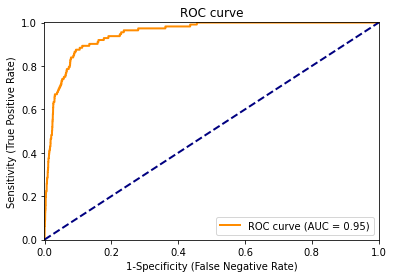

In [15]:
## Performance Measure

#Confusion Matrix
cm_rf = np.transpose(confusion_matrix(y_test, y_pred_rf))
print("\nConfusion matrix Random Forest: \n" + str(cm_rf))

#Auc Calculation
auc_rf=roc_auc_score(y_test, y_pred_prob_rf)
print("\nAUC Random Forest: " +str(auc_rf))

#ROC plot
plot_roc(y_test, y_pred_prob_rf)

In [19]:
from sklearn.metrics import classification_report
#class_names=[str(x) for x in classifier_RF.]
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     18463
           1       0.14      0.43      0.21       112

    accuracy                           0.98     18575
   macro avg       0.57      0.71      0.60     18575
weighted avg       0.99      0.98      0.99     18575



## Feature Importance Plot

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance Random Forest')

Text(0.5, 0, 'Decrease in Gini (recal, Gini = 2*AUC-1)')

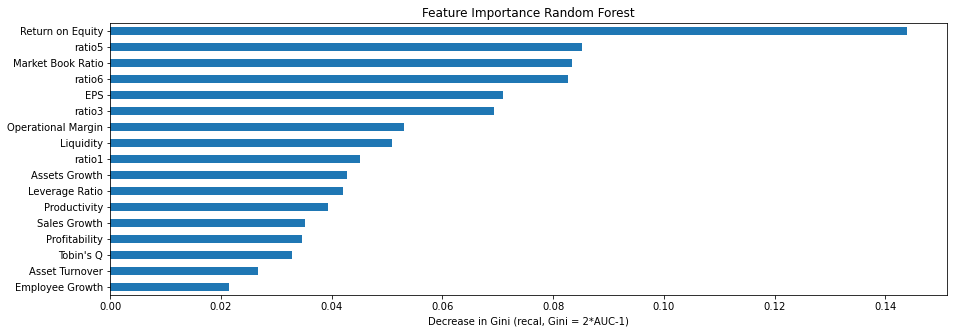

In [276]:
#Feature Importance - Using Random Forest Model
#importances = grid_search_RF.best_estimator_.feature_importances_ 

#Plot the varibales according to their importance
#plt.figure(figsize=(15,5))
#plt.title('Feature Importance Random Forest')
#plt.xlabel('Decrease in Gini (recal, Gini = 2*AUC-1)')
#feature_importances = pd.Series(grid_search_RF.best_estimator_.feature_importances_ , index=X_train.columns)
#feature_importances.nlargest(17).sort_values().plot(kind='barh', align='center')

# SVM Model

## Grid Search for Hyper Paramter tuning with Cross Validation

In [30]:
#Grid Search with cross validation
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold

#Score_func defines the performance measure with which the gridsearchCV should use
score_func = make_scorer(roc_auc_score, greater_is_better=True)

# Create the parameter grid to test various hyper parameters
#param_grid_svm = {'kernel': ['rbf'], 'gamma': [0.001, 0.01,0.1],
                    # 'C': [1, 10, 100, 1000]}
#new_params_svm = {'svc__' + key: param_grid_svm[key] for key in param_grid_svm}  

##remi
param_grid_svm = {'kernel': ['linear'], 'gamma': [0.001, 0.01,0.1],'C': [1, 10, 100, 1000]}
new_params_svm = {'svc__' + key: param_grid_svm[key] for key in param_grid_svm}

#Define the SVM model
svm_model = svm.SVC(probability=True,random_state=77300)

#Smote sampling
sm = SMOTE(random_state=42)
pipeline = make_pipeline(sm,svm_model)

# Hyper-parameter tuning ("optimization") using the function GridSearchCV for maximizing AUC
#5-fold cross-validation
# Instantiate the grid search model
cv = RepeatedKFold(n_splits=5, n_repeats=2)
grid_search_svm = GridSearchCV(estimator = pipeline, param_grid = new_params_svm, 
                          cv = cv, scoring = score_func, return_train_score = True, n_jobs=-1, verbose = 2)

new_params_svm

{'svc__kernel': ['linear'],
 'svc__gamma': [0.001, 0.01, 0.1],
 'svc__C': [1, 10, 100, 1000]}

## Fitting the Model

In [ ]:
#Fitting the model to training data
grid_search_SVM = grid_search_svm.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


## Best Hyper-Parameter Values

In [ ]:
#Finding out which are the best hyper parameter values where auc for the model is highest
print('\nBest Hyper-Parameter values SVM:' + str(grid_search_SVM.best_params_)) 
grid_search_SVM.best_params_

#Best Estimator for SVM Model
best_grid_svm = grid_search_SVM.best_estimator_
best_grid_svm

#Viweing the best score of the model
best_result_svm = grid_search_SVM.best_score_
print("\nBest Score SVM: "+str(best_result_svm))

## Using the Best Model to predict testing data¶

In [ ]:
#Using the above (best) model with the best hyper parameter values to predict the testing data
class_threshold=0.50
y_pred_prob_svm = grid_search_SVM.predict_proba(X_test)[:,1] # probabilities
y_pred_svm = np.where(y_pred_prob_svm > class_threshold, 1, 0) # classification

## Performace Measures

In [ ]:
## Performance Measures
#Confusion Matrix
cm_svm = np.transpose(confusion_matrix(y_test, y_pred_svm))
print("\nConfusion matrix SVM: \n" + str(cm_svm))

#Auc Calculation
auc_svm = roc_auc_score(y_test, y_pred_prob_svm)
print("\nAUC SVM:  " + str(auc_svm))

#ROC plot
plot_roc(y_test, y_pred_prob_svm)

#Other Performance Metrics
print("                                   Accuracy SVM: " + str(custom_accuracy_score(y_test, y_pred_svm))) 
print("                   SENSITIVITY (aka RECALL) SVM: " + str(custom_sensitivity_score(y_test, y_pred_svm)))
print("                 SPECIFICITY (aka FALL-OUT) SVM: " + str(custom_specificity_score(y_test, y_pred_svm)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION) SVM: " + str(custom_ppv_score(y_test, y_pred_svm)))
print("                 NEGATIVE PREDICTIVE VALUE) SVM: " + str(custom_npv_score(y_test, y_pred_svm)))